In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data=pd.read_csv("US_Heart_Patients.csv")

In [48]:
data.shape

(4240, 16)

In [49]:
data.rename(columns={'male':'gender'},inplace=True)

In [50]:
data1=data.dropna()

In [51]:
data1.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [52]:
data1.shape

(3658, 16)

In [57]:
X_pm=data1[['age','gender','cigsPerDay','sysBP','glucose']]
X_all=data1.drop('TenYearCHD',axis=1)
Y=data1['TenYearCHD']

In [55]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()
X_PMS=sc.fit_transform(X_pm)
X_all=sc.fit_transform(X_all)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param= {'n_neighbors': np.arange(1,50),'weights':['uniform','distance']} # for 500 it should be 452
GS= GridSearchCV(knn,param, cv=5,scoring='roc_auc')
GS.fit(X_PMS,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [60]:
GS.best_params_

{'n_neighbors': 49, 'weights': 'distance'}

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
par_dt= {'criterion':["entropy",'gini']}
GS_dt= GridSearchCV(dt,par_dt, cv=5,scoring='roc_auc')
GS_dt.fit(X_all,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [63]:
GS_dt.best_params_

{'criterion': 'gini'}

In [28]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [29]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',random_state = 0)
RF=RandomForestClassifier(n_estimators=10,random_state=0)
KNN_final= KNeighborsClassifier(n_neighbors=452,weights='distance')
NB=GaussianNB()
#bagging models
KNN_BAGG=BaggingClassifier(base_estimator=KNN_final, n_estimators=10,random_state = 0)
LR_BAGG=BaggingClassifier(base_estimator=LR, n_estimators=10,random_state = 0)
NB_BAGG=BaggingClassifier(base_estimator=NB, n_estimators=10,random_state = 0)
DT_BAGG=BaggingClassifier(n_estimators=10,random_state = 0)
#bosting models
LR_BOST=AdaBoostClassifier(base_estimator=LR, n_estimators=50,random_state = 0)
NB_BOST=AdaBoostClassifier(base_estimator=NB, n_estimators=50,random_state = 0)
RF_BOST=AdaBoostClassifier(base_estimator=RF, n_estimators=50,random_state = 0)
DT_BOST=AdaBoostClassifier(base_estimator=DT, n_estimators=50,random_state = 0)

In [31]:
models=[]
models.append(("LR",LR))
models.append(("FGDT",DT))
models.append(("RF",RF))
models.append(("KNN_UV",KNN_final))
models.append(("NAIVEBAYES",NB))
models.append(("KNN_BAG",KNN_BAGG))
models.append(("LR_BAG",LR_BAGG))
models.append(("NB_BAG",NB_BAGG))
models.append(("DT_BAG",DT_BAGG))
models.append(("LR_BOST",LR_BOST))
models.append(("NB_BOST",NB_BOST))
models.append(("RF_BOST",RF_BOST))
models.append(("DT_BOST",DT_BOST))

LR: 0.730386 (0.002336)
FGDT: 0.555879 (0.002426)
RF: 0.648984 (0.003420)
KNN_UV: 0.715577 (0.002333)
NAIVEBAYES: 0.713966 (0.002759)
KNN_BAG: 0.717566 (0.002321)
LR_BAG: 0.729615 (0.002390)
NB_BAG: 0.714629 (0.002760)
DT_BAG: 0.657649 (0.004137)
LR_BOST: 0.730095 (0.002305)
NB_BOST: 0.469215 (0.003449)
RF_BOST: 0.649975 (0.001900)
DT_BOST: 0.552864 (0.002557)


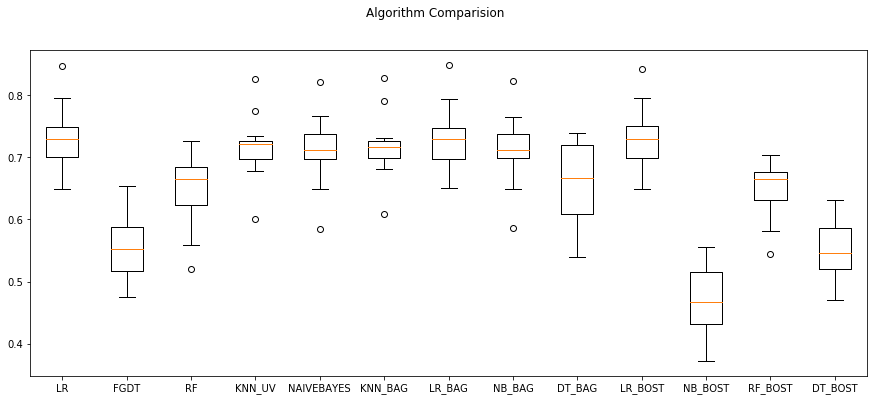

In [32]:
# evaluate each model in turn
from sklearn import model_selection
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=15,random_state=0)
    cv_results = model_selection.cross_val_score(model,X_PMS,Y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
#boxplot algorith comparision
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
#TUNING N_estimator or bagging lr model
auc_var=[]
for val in np.arange(1,10):
    LR_BAGG=BaggingClassifier(base_estimator=LR, n_estimators=val)
    kfold = model_selection.KFold(shuffle=True,n_splits=15,random_state=0)
    result=model_selection.cross_val_score(LR_BAGG,X_PMS,Y,cv=kfold,scoring='roc_auc')
    auc_var.append(np.var(results,ddof=1))
print(auc_var)

[0.009178591517455972, 0.009178591517455972, 0.009178591517455972, 0.009178591517455972, 0.009178591517455972, 0.009178591517455972, 0.009178591517455972, 0.009178591517455972, 0.009178591517455972]


In [34]:
np.argmin(auc_var)

0

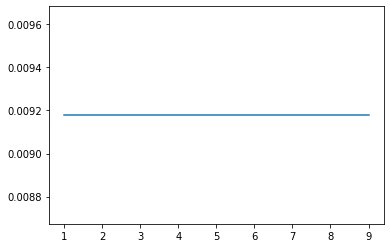

In [35]:
x_axis=np.arange(1,10)
plt.plot(x_axis,auc_var)